In [57]:
%matplotlib inline
import math
import gpxpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import gpxpy.geo as geo
import gpxpy.gpx as gpx

from functools import reduce

In [120]:
pd.set_option('display.max_rows', 100)
plt.rcParams['figure.figsize'] = (8,8)
DIR = 'data'
df = pd.read_csv("../{}/all_tracks.tsv".format(DIR), sep='\t')

In [26]:
df.shape

(40120, 7)

# We've got 40 120 points.

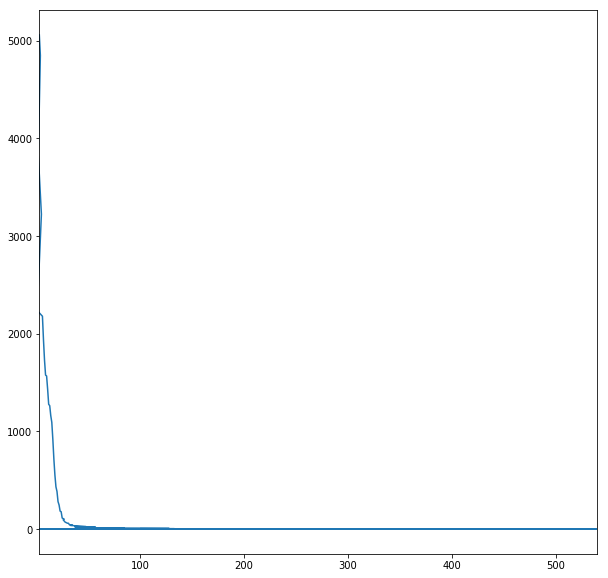

In [73]:
ptime = pd.to_datetime(df.time)
diff = ptime - ptime.shift()
diff.dt.total_seconds().value_counts().plot();

In [28]:
diff.dt.total_seconds().value_counts().head(50)

3.0     5058
4.0     4848
2.0     3832
5.0     3223
1.0     2237
6.0     2179
7.0     1937
8.0     1729
9.0     1577
10.0    1568
11.0    1432
12.0    1278
13.0    1264
14.0    1162
15.0    1094
16.0     920
17.0     718
18.0     553
19.0     433
20.0     386
21.0     282
22.0     248
23.0     185
24.0     179
25.0     114
27.0     102
26.0      95
28.0      71
29.0      67
30.0      61
31.0      61
32.0      45
34.0      42
35.0      40
33.0      39
36.0      36
48.0      26
37.0      26
42.0      25
44.0      24
40.0      24
39.0      24
41.0      23
47.0      22
57.0      21
50.0      21
52.0      20
38.0      20
45.0      20
43.0      19
Name: time, dtype: int64

In [29]:
diff.dt.total_seconds().value_counts().describe()

count     310.000000
mean      129.416129
std       570.342903
min         1.000000
25%         1.000000
50%         2.000000
75%         6.000000
max      5058.000000
Name: time, dtype: float64

In [30]:
diff.dt.total_seconds().value_counts().quantile(0.9)

46.600000000000364

# Time Differences quantiles:
## 50 % -> 2 sec.
## 75% -> 6 sec.
## 90% -> 47 sec.

In [31]:
df.groupby(['filename', 'track_name', 'seg_idx']).count()

time  latitude  longitude  elevation
filename     track_name       seg_idx                                      
20081009.gpx ACTIVE LOG121455 0        2364      2364       2364       2364
             ACTIVE LOG173200 0           4         4          4          4
             ACTIVE LOG173528 0          20        20         20         20
             ACTIVE LOG174645 0           2         2          2          2
             ACTIVE LOG174700 0           4         4          4          4
             ACTIVE LOG174953 0           1         1          1          1
             ACTIVE LOG175004 0          38        38         38         38
             ACTIVE LOG180624 0         281       281        281        281
             ACTIVE LOG203525 0           2         2          2          2
             ACTIVE LOG203610 0           1         1          1          1
             ACTIVE LOG203642 0           1         1          1          1
             ACTIVE LOG203718 0         310       310        310        310
             ACTIVE LOG214705 0           1         1          1          1
             ACTIVE LOG214744 0          24        24         24         24
             ACTIVE LOG215320 0           1         1          1          1
             ACTIVE LOG215322 0           5         5          5          5
             ACTIVE LOG215415 0           1         1          1          1
             ACTIVE LOG215731 0          24        24         24         24
             ACTIVE LOG220049 0         158       158        158        158
             ACTIVE LOG225013 0           1         1          1          1
             ACTIVE LOG225031 0           8         8          8          8
             ACTIVE LOG225315 0           1         1          1          1
             ACTIVE LOG225324 0          34        34         34         34
             ACTIVE LOG225955 0           1         1          1          1
             ACTIVE LOG230003 0         104       104        104        104
             ACTIVE LOG231620 0           1         1          1          1
             ACTIVE LOG231622 0          18        18         18         18
             ACTIVE LOG231941 0          49        49         49         49
             ACTIVE LOG232813 0           3         3          3          3
             ACTIVE LOG232929 0           1         1          1          1
             ACTIVE LOG232931 0           7         7          7          7
             ACTIVE LOG233116 0           1         1          1          1
             ACTIVE LOG233445 0          17        17         17         17
             ACTIVE LOG233652 0           1         1          1          1
             ACTIVE LOG233653 0         176       176        176        176
20081010.gpx ACTIVE LOG000008 0           9         9          9          9
             ACTIVE LOG000156 0           1         1          1          1
             ACTIVE LOG000204 0          12        12         12         12
             ACTIVE LOG172403 0        1768      1768       1768       1768
             ACTIVE LOG201349 0           8         8          8          8
             ACTIVE LOG201421 0         126       126        126        126
20081011.gpx ACTIVE LOG093324 0           1         1          1          1
             ACTIVE LOG093404 0           1         1          1          1
             ACTIVE LOG104258 0           1         1          1          1
             ACTIVE LOG104305 0        4934      4934       4934       4934
20081012.gpx ACTIVE LOG000003 0         561       561        561        561
20081013.gpx ACTIVE LOG210500 0           1         1          1          1
20081017.gpx ACTIVE LOG181201 0           1         1          1          1
             ACTIVE LOG181407 0         390       390        390        390
             ACTIVE LOG202430 0           1         1          1          1
             ACTIVE LOG202436 0         871       871        871        871
20081018.gp

In [32]:
df.track_name.nunique()

78

In [33]:
df.groupby(['filename', 'track_name', 'seg_idx']).count().shape

(78, 4)

# It seems that all the track names are unique in all files.
# Every track is composed of only one segment.

In [34]:
df.groupby(['filename', 'track_name', 'seg_idx']).count().sort_values(by='elevation', ascending=False)

time  latitude  longitude  elevation
filename     track_name       seg_idx                                      
20081022.gpx ACTIVE LOG075039 0        5215      5215       5215       5215
20081011.gpx ACTIVE LOG104305 0        4934      4934       4934       4934
20081020.gpx ACTIVE LOG065519 0        3825      3825       3825       3825
20081024.gpx ACTIVE LOG084418 0        3164      3164       3164       3164
20081019.gpx ACTIVE LOG070400 0        2913      2913       2913       2913
20081021.gpx ACTIVE LOG091009 0        2861      2861       2861       2861
20081009.gpx ACTIVE LOG121455 0        2364      2364       2364       2364
20081019.gpx ACTIVE LOG142335 0        1960      1960       1960       1960
20081023.gpx ACTIVE LOG132008 0        1820      1820       1820       1820
20081010.gpx ACTIVE LOG172403 0        1768      1768       1768       1768
20081020.gpx ACTIVE LOG195516 0        1305      1305       1305       1305
20081018.gpx ACTIVE LOG123545 0        1187      1187       1187       1187
20081021.gpx ACTIVE LOG194134 0        1117      1117       1117       1117
20081018.gpx ACTIVE LOG082258 0         928       928        928        928
20081017.gpx ACTIVE LOG202436 0         871       871        871        871
20081012.gpx ACTIVE LOG000003 0         561       561        561        561
20081023.gpx ACTIVE LOG083053 0         479       479        479        479
20081021.gpx ACTIVE LOG075135 0         456       456        456        456
20081024.gpx ACTIVE LOG181153 0         405       405        405        405
20081017.gpx ACTIVE LOG181407 0         390       390        390        390
20081009.gpx ACTIVE LOG203718 0         310       310        310        310
             ACTIVE LOG180624 0         281       281        281        281
             ACTIVE LOG233653 0         176       176        176        176
             ACTIVE LOG220049 0         158       158        158        158
20081010.gpx ACTIVE LOG201421 0         126       126        126        126
20081009.gpx ACTIVE LOG230003 0         104       104        104        104
20081025.gpx ACTIVE LOG060129 0          80        80         80         80
20081009.gpx ACTIVE LOG231941 0          49        49         49         49
             ACTIVE LOG175004 0          38        38         38         38
20081020.gpx ACTIVE LOG194928 0          38        38         38         38
20081009.gpx ACTIVE LOG225324 0          34        34         34         34
             ACTIVE LOG214744 0          24        24         24         24
             ACTIVE LOG215731 0          24        24         24         24
             ACTIVE LOG173528 0          20        20         20         20
             ACTIVE LOG231622 0          18        18         18         18
             ACTIVE LOG233445 0          17        17         17         17
20081010.gpx ACTIVE LOG000204 0          12        12         12         12
             ACTIVE LOG000008 0           9         9          9          9
             ACTIVE LOG201349 0           8         8          8          8
20081009.gpx ACTIVE LOG225031 0           8         8          8          8
             ACTIVE LOG232931 0           7         7          7          7
             ACTIVE LOG215322 0           5         5          5          5
             ACTIVE LOG173200 0           4         4          4          4
             ACTIVE LOG174700 0           4         4          4          4
20081018.gpx ACTIVE LOG122811 0           3         3          3          3
20081009.gpx ACTIVE LOG232813 0           3         3          3          3
20081023.gpx ACTIVE LOG083008 0           3         3          3          3
20081009.gpx ACTIVE LOG203525 0           2         2          2          2
20081023.gpx ACTIVE LOG131830 0           2         2          2          2
20081009.gpx ACTIVE LOG174645 0           2         2          2          2
20081023.gpx ACTIVE LOG082928 0           1         1          1          1
20081009.gp

In [35]:
df.groupby(['filename', 'track_name', 'seg_idx'])\
  .count()\
  .sort_values(by='elevation', ascending=False)\
  .elevation\
  .describe()

count      78.000000
mean      514.358974
std      1113.122378
min         1.000000
25%         1.000000
50%         8.000000
75%       370.000000
max      5215.000000
Name: elevation, dtype: float64

# Median for the number of points in a track is 8.
# Let's use all the tracks with length > 8.

In [36]:
df.groupby(['filename', 'track_name', 'seg_idx'])\
  .count()\
  .query('elevation > 8')\
  .sum()

time         40041
latitude     40041
longitude    40041
elevation    40041
dtype: int64

# We are still left with 40k data points.

In [37]:
df.groupby(['filename', 'track_name', 'seg_idx'])\
  .count()\
  .query('elevation > 100')\
  .sum()

time         39678
latitude     39678
longitude    39678
elevation    39678
dtype: int64

In [38]:
df.groupby(['filename', 'track_name', 'seg_idx'])\
  .count()\
  .query('elevation > 100')\
  .shape

(26, 4)

# If we use tracks longer than 100 then we are still left with 39 678 data points and 26 tracks.
# We went down from 78 tracks to 26 tracks.

In [39]:
longer_than_hundread_tracks = df\
  .groupby(['filename', 'track_name', 'seg_idx'])\
  .count()\
  .query('elevation > 100')\
  .reset_index()\
  .track_name

In [40]:
filtered_df = pd.read_csv("../{}/filtered_tracks.tsv".format(DIR), sep='\t')

In [41]:
filtered_df['time'] = pd.to_datetime(filtered_df.time)
filtered_df['location'] = filtered_df.apply(lambda row: geo.Location(row.latitude, row.longitude, row.elevation), axis=1)
filtered_df['point'] = filtered_df.apply(lambda row: gpx.GPXTrackPoint(row.latitude, row.longitude, row.elevation, row.time), axis=1)

In [42]:
track_to_speeds = {}
for track_name, group in filtered_df[['track_name', 'point']].groupby('track_name'):
    points = group.point.tolist()
    prev = points[0]
    speeds = []
    for cur in points[1:]:
        speeds.append(prev.speed_between(cur))
        prev = cur
    
    track_to_speeds[track_name] = speeds

In [43]:
track_speeds = list(track_to_speeds.items())[0][1]

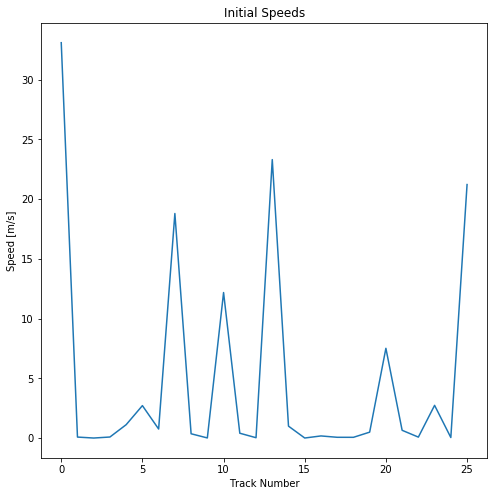

In [121]:
first_speed = [speeds[0] for speeds in track_to_speeds.values()]
plt.plot(first_speed)
plt.title("Initial Speeds")
plt.xlabel("Track Number")
plt.ylabel("Speed [m/s]")

In [45]:
all_speeds = [x for track_name, speeds in track_to_speeds.items() for x in speeds]

In [46]:
pd.Series(all_speeds).describe()

count    39652.000000
mean        15.687487
std         12.664861
min          0.001445
25%          1.576683
50%         15.046587
75%         27.983945
max        429.546653
dtype: float64

In [47]:
sorted(all_speeds, reverse=True)[:30]

[429.5466531727601,
 279.72869868296567,
 220.1682989315979,
 120.59909614363127,
 102.70549189722813,
 87.93123058417719,
 86.60958778646342,
 59.738478182076136,
 47.242146964760714,
 39.73066066039824,
 38.062014087978184,
 37.148634820376195,
 37.10593692411048,
 36.78191536512388,
 36.7481014326589,
 36.71013820138525,
 36.66069351075523,
 36.64001290965557,
 36.60396545844524,
 36.5897035164526,
 36.527942207538345,
 36.52540635911707,
 36.51703151880843,
 36.51061720313796,
 36.50979280082634,
 36.454434969820326,
 36.45268911908958,
 36.447166873842136,
 36.42541654003535,
 36.41009086385714]

# The speed is in m/s.
# 1 m/s = 3.6 km/h
# 36 m/s = 129.6
# Looks like we've got some weird outliers. Speed over 40 m/s is hardly possible.

In [48]:
reasonable_speeds = [speed for speed in all_speeds if speed < 40]

# Plot speeds < 40 m/s

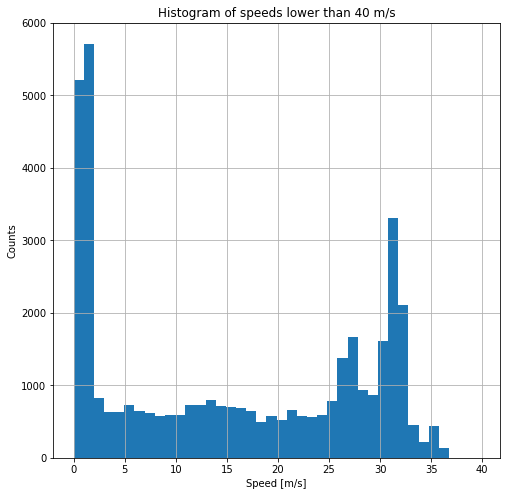

In [89]:
pd.Series(reasonable_speeds).hist(bins=40)
plt.title("Histogram of speeds lower than 40 m/s")
plt.xlabel("Speed [m/s]")
plt.ylabel("Counts")

# Plot speeds < 3 m/s
# Maybe the first peak corresponds to "still" state and 2nd to "walking".

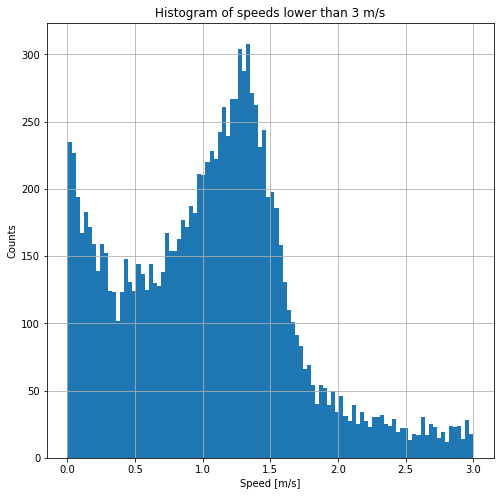

In [92]:
pd.Series([speed for speed in all_speeds if speed < 3]).hist(bins=100)
plt.title("Histogram of speeds lower than 3 m/s")
plt.xlabel("Speed [m/s]")
plt.ylabel("Counts")

In [51]:
sorted([speed for speed in all_speeds if speed < 5])[:20]

[0.001444550179117532,
 0.0015068857951329678,
 0.0016037499926921286,
 0.0019110588802030114,
 0.00204825633956679,
 0.002223636805994446,
 0.0025172413793135436,
 0.0027751614265593733,
 0.0028615729671354452,
 0.003088793795476857,
 0.003304693228659188,
 0.003647841580643187,
 0.003733496746713079,
 0.00406775519035945,
 0.004239061614159816,
 0.004272727272727004,
 0.0046337222155690095,
 0.004670151638639197,
 0.0047342207820561715,
 0.004865139041451525]

# The distribution does not look normal even after taking log.

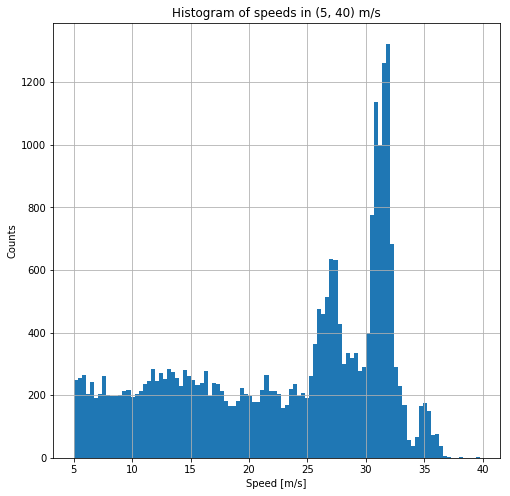

In [95]:
pd.Series([speed for speed in all_speeds if speed < 40 and speed > 5]).hist(bins=100)
plt.title("Histogram of speeds in (5, 40) m/s")
plt.xlabel("Speed [m/s]")
plt.ylabel("Counts")

# Haversine: http://www.movable-type.co.uk/scripts/latlong.html

In [53]:
track_to_diffs = {}
for track_name, group in filtered_df[['track_name', 'point']].groupby('track_name'):
    points = group.point.tolist()
    prev = points[0]
    diffs = []
    for cur in points[1:]:
        # Time difference in seconds.
        time_diff = cur.time_difference(prev)
        dLoc = np.array([cur.latitude - prev.latitude,
                         cur.longitude - prev.longitude,
                         cur.elevation - prev.elevation])
        diffs.append(tuple(dLoc/time_diff))
        prev = cur
    
    track_to_diffs[track_name] = diffs

In [54]:
all_diffs = [diff for _, diffs in track_to_diffs.items() for diff in diffs]

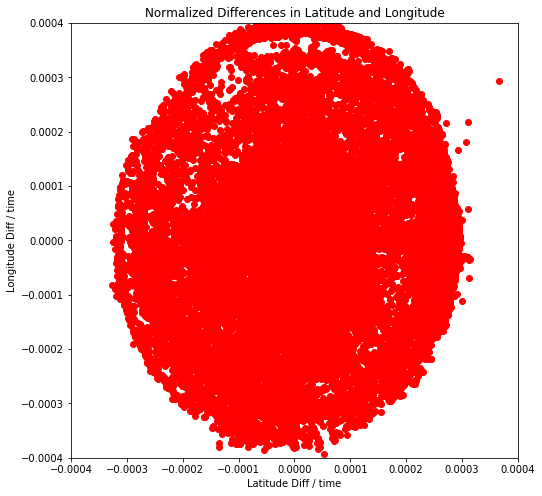

In [122]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot([lat for lat, _, _ in all_diffs],
         [lon for _, lon, _ in all_diffs],
         'ro')
ax.set_xlim((-4.0e-4, 4.0e-4))
ax.set_ylim((-4.0e-4, 4.0e-4))
plt.title("Normalized Differences in Latitude and Longitude")
plt.xlabel("Latitude Diff / time")
plt.ylabel("Longitude Diff / time")

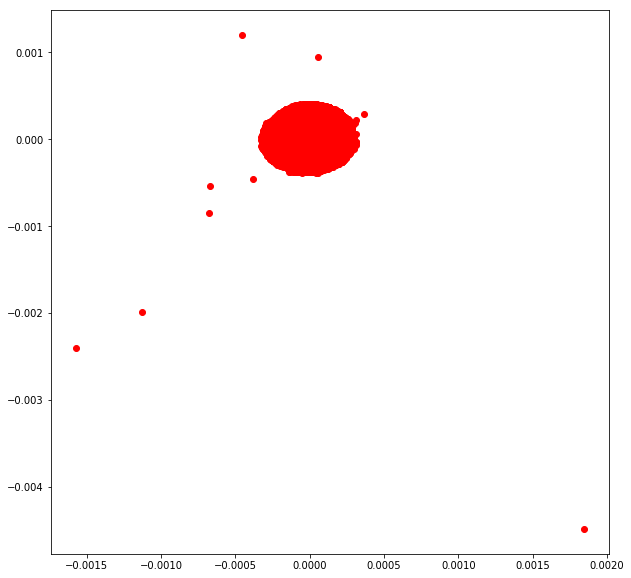

In [56]:
plt.plot([lat for lat, _, _ in all_diffs], [lon for _, lon, _ in all_diffs], 'ro')

(-1e-05, 1e-05)

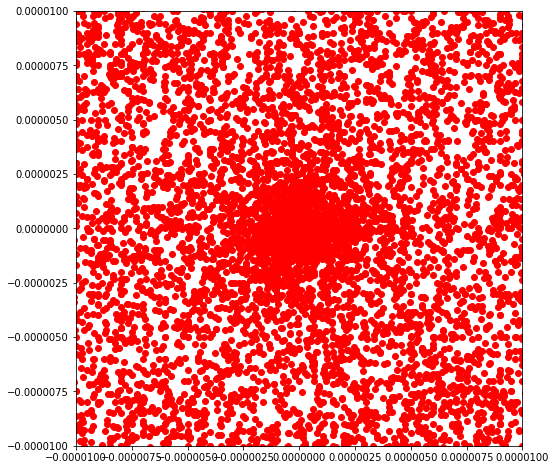

In [97]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot([lat for lat, _, _ in all_diffs],
         [lon for _, lon, _ in all_diffs],
         'ro')
ax.set_xlim((-1.0e-5, 1.0e-5))
ax.set_ylim((-1.0e-5, 1.0e-5))

# Let's look at bearing

In [110]:
def bearing(point1, point2):
    """North is zero degrees."""
    lat1r = math.radians(point1.latitude)
    lat2r = math.radians(point2.latitude)
    dlon = math.radians(point2.longitude - point1.longitude)

    y = math.sin(dlon) * math.cos(lat2r)
    x = math.cos(lat1r) * math.sin(lat2r) - math.sin(lat1r) \
                        * math.cos(lat2r) * math.cos(dlon)
    return math.degrees(math.atan2(y, x))

In [111]:
track_to_bearing = {}
for track_name, group in filtered_df[['track_name', 'point']].groupby('track_name'):
    points = group.point.tolist()
    prev = points[0]
    res = []
    for cur in points[1:]:
        res.append(bearing(prev, cur)/prev.time_difference(cur))
        prev = cur
    
    track_to_bearing[track_name] = res 

In [112]:
all_bearings = [x for track_name, bearings in track_to_bearing.items() for x in bearings]

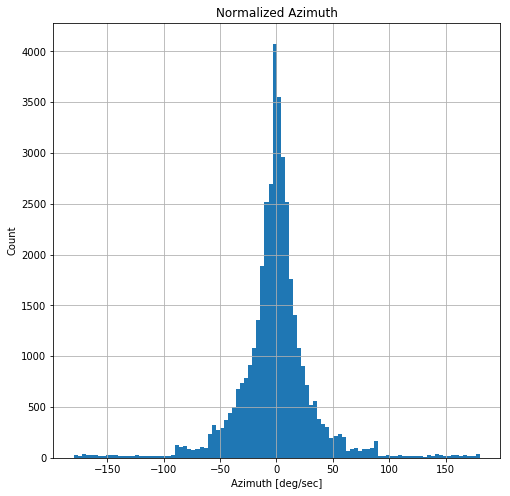

In [124]:
plt.rcParams['figure.figsize'] = (8,8)
pd.Series(all_bearings).hist(bins=100)
plt.title("Normalized Azimuth")
plt.xlabel("Azimuth [deg/sec]")
plt.ylabel("Count")

In [114]:
all_bearing_diffs = [x for track_name, bearings in track_to_bearing.items() for x in np.diff(bearings)]

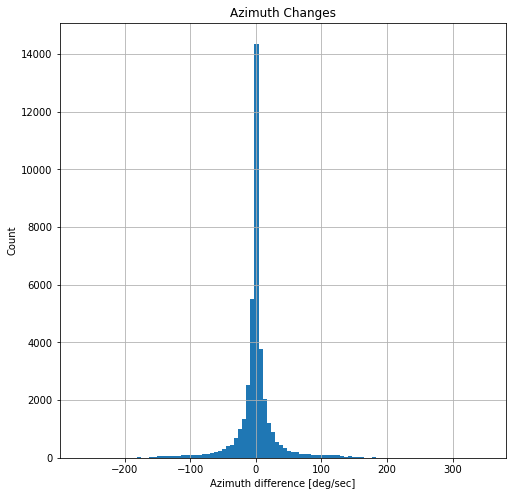

In [125]:
pd.Series(all_bearing_diffs).hist(bins=100)
plt.title("Azimuth Changes")
plt.xlabel("Azimuth difference [deg/sec]")
plt.ylabel("Count")

# Let's look at time diffs again

In [74]:
track_to_timediff = {}
for track_name, group in filtered_df[['track_name', 'point']].groupby('track_name'):
    points = group.point.tolist()
    prev = points[0]
    res = []
    for cur in points[1:]:
        res.append(prev.time_difference(cur))
        prev = cur
    
    track_to_timediff[track_name] = res 

In [75]:
all_timediffs = [x for track_name, diffs in track_to_timediff.items() for x in diffs]

In [77]:
pd.Series(all_timediffs).describe()

count    39652.000000
mean        10.838823
std         40.990676
min          1.000000
25%          3.000000
50%          6.000000
75%         12.000000
max       3338.000000
dtype: float64